In [ ]:
# import sys
# print(sys.version)

In [ ]:
# !pip install statsmodels
# !pip install pandas 
# !pip install scikit-learn 
# !pip install matplotlib

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Gasoline data
y = pd.Series([17,21,19,23,18,16,20,18,22,20,15,22])

# Naive forecast 
naive_forecast = y.shift(1)

# Remove the first row (no forecast for week 1)
actual = y[1:]
naive_f = naive_forecast[1:]

print("Naive Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, naive_f))
print("MSE :", mean_squared_error(actual, naive_f))
print("MAPE:", mean_absolute_percentage_error(actual, naive_f))

Naive Forecast Metrics:
MAE : 3.727272727272727
MSE : 16.272727272727273
MAPE: 0.1924431467337646


In [3]:
# Average of all past values forecast (cumulative mean)
avg_forecast = y.expanding().mean().shift(1)

# Remove the first row (no forecast for week 1)
actual = y[1:]
avg_f = avg_forecast[1:]

print("\nAverage of Past Values Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, avg_f))
print("MSE :", mean_squared_error(actual, avg_f))
print("MAPE:", mean_absolute_percentage_error(actual, avg_f))


Average of Past Values Forecast Metrics:
MAE : 2.4372294372294374
MSE : 8.097324263038548
MAPE: 0.12848966799559686


# Ariline Passengers Data: 
- Monthly total number of airline passengers (in thousands) from January 1949 to December 1960.

In [4]:
data = sm.datasets.get_rdataset("AirPassengers").data
data = data.rename(columns={'value': 'passengers'})


In [5]:
data

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [ ]:
y = data['passengers']

# 1. Complete Naive forecast: 
### Your code here:
naive_forecast = 

### End of your code

# 2. Complete Average of all past values forecast (cumulative mean):
### Your code here:
avg_forecast = 

### End of your code

# Remove the first row (no forecast for week 1)
actual = y[1:]
naive_f = naive_forecast[1:]
avg_f = avg_forecast[1:]

print("Naive Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, naive_f))
print("MSE :", mean_squared_error(actual, naive_f))
print("MAPE:", mean_absolute_percentage_error(actual, naive_f))

print("\nAverage of Past Values Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, avg_f))
print("MSE :", mean_squared_error(actual, avg_f))
print("MAPE:", mean_absolute_percentage_error(actual, avg_f))

Naive Forecast Metrics:
MAE : 25.86013986013986
MSE : 1136.3916083916083
MAPE: 0.09019447701311435

Average of Past Values Forecast Metrics:
MAE : 93.61143910845064
MSE : 14534.980309488683
MAPE: 0.2809710596717819


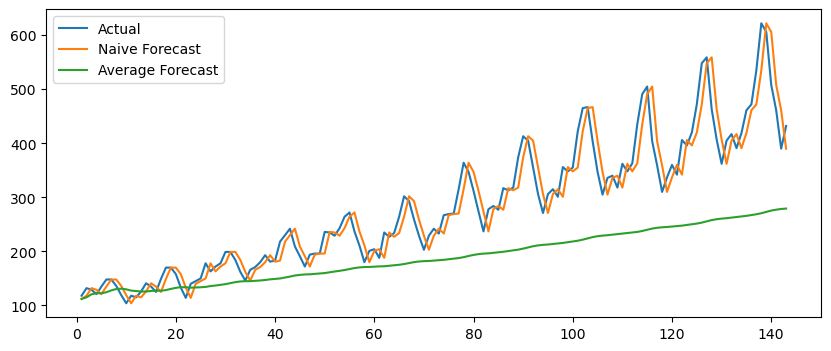

In [7]:
plt.figure(figsize=(10,4))
plt.plot(actual, label="Actual")
plt.plot(naive_f, label="Naive Forecast")
plt.plot(avg_f, label="Average Forecast")
plt.legend()
plt.show()

# Why is Naive better?

# If we use the Naive and Average forecasting methods to predict multiple future periods (e.g., gasoline data: week 13-16), what would be the limitation?

In [8]:
y = pd.Series([17,21,19,23,18,16,20,18,22,20,15,22],
    index=[f"Week {i}" for i in range(1, 13)])
df = pd.DataFrame({"Actual": y})
df["Naive_Forecast"] = df["Actual"].shift(1).astype('Int64')
df

,Actual,Naive_Forecast
Week 1,17,<NA>
Week 2,21,17
Week 3,19,21
Week 4,23,19
Week 5,18,23
Week 6,16,18
Week 7,20,16
Week 8,18,20
Week 9,22,18
Week 10,20,22


In [9]:
df['Actual'].mean()

19.25